In [1]:
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install yellowbrick
!pip3 install seaborn
!pip3 install matplotlib

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("../dbt/dbt_source/mint/seeds/customer_clustering_dataset.csv")

In [4]:
df.head()

,wm.workspace_id,wm.member_count,task_created_count,task_modified_count,task_archived_count,label_added_preset_count,label_added_custom_count,label_created_count,label_modified_count,column_renamed_count,board_renamed_count,data_generated_at
0,e5d7d4ad-c23a-45e8-9f68-205ff8314d3f,50,28,19,12,12,20,12,11,7,8,"September 10, 2024, 11:17 PM"
1,477fa20a-3178-479d-a995-ed85cac29203,1,8,5,5,0,3,0,0,2,2,"September 10, 2024, 11:17 PM"
2,c0fbdccc-6774-4ecb-a180-986d698a0501,8,14,8,7,7,14,5,5,6,7,"September 10, 2024, 11:17 PM"
3,d6875794-0f1f-4321-a752-af1f746c8846,4,10,5,5,5,10,5,5,5,5,"September 10, 2024, 11:17 PM"
4,b19bdcbe-5d89-4893-905a-7980b800c940,4,9,5,9,5,9,5,5,5,5,"September 10, 2024, 11:17 PM"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   wm.workspace_id           5 non-null      object
 1   wm.member_count           5 non-null      int64 
 2   task_created_count        5 non-null      int64 
 3   task_modified_count       5 non-null      int64 
 4   task_archived_count       5 non-null      int64 
 5   label_added_preset_count  5 non-null      int64 
 6   label_added_custom_count  5 non-null      int64 
 7   label_created_count       5 non-null      int64 
 8   label_modified_count      5 non-null      int64 
 9   column_renamed_count      5 non-null      int64 
 10  board_renamed_count       5 non-null      int64 
 11  data_generated_at         5 non-null      object
dtypes: int64(10), object(2)
memory usage: 612.0+ bytes


In [6]:
df.drop(['wm.workspace_id', 'data_generated_at'], axis=1, inplace=True)

In [7]:
df.describe()

,wm.member_count,task_created_count,task_modified_count,task_archived_count,label_added_preset_count,label_added_custom_count,label_created_count,label_modified_count,column_renamed_count,board_renamed_count
count,5.000000,5.000000,5.0000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,13.400000,13.800000,8.4000,7.600000,5.80000,11.200000,5.40000,5.200000,5.000000,5.400000
std,20.610677,8.258329,6.0663,2.966479,4.32435,6.300794,4.27785,3.898718,1.870829,2.302173
min,1.000000,8.000000,5.0000,5.000000,0.00000,3.000000,0.00000,0.000000,2.000000,2.000000
25%,4.000000,9.000000,5.0000,5.000000,5.00000,9.000000,5.00000,5.000000,5.000000,5.000000
50%,4.000000,10.000000,5.0000,7.000000,5.00000,10.000000,5.00000,5.000000,5.000000,5.000000
75%,8.000000,14.000000,8.0000,9.000000,7.00000,14.000000,5.00000,5.000000,6.000000,7.000000
max,50.000000,28.000000,19.0000,12.000000,12.00000,20.000000,12.00000,11.000000,7.000000,8.000000


In [8]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [9]:
pca = PCA()
df_scaled = pd.DataFrame(pca.fit_transform(df_scaled))

In [10]:
df_scaled.head()

,wm.member_count,task_created_count,task_modified_count,task_archived_count,label_added_preset_count,label_added_custom_count,label_created_count,label_modified_count,column_renamed_count,board_renamed_count
0,1.985381,1.922433,1.953606,1.658312,1.602972,1.561502,1.724938,1.663264,1.195229,1.262672
1,-0.672643,-0.785219,-0.626628,-0.979912,-1.499554,-1.455036,-1.411313,-1.491202,-1.792843,-1.651186
2,-0.292925,0.027077,-0.073721,-0.226134,0.310253,0.496841,-0.104542,-0.057354,0.597614,0.777029
3,-0.509907,-0.514454,-0.626628,-0.979912,-0.206835,-0.212932,-0.104542,-0.057354,0.000000,-0.194257
4,-0.509907,-0.649836,-0.626628,0.527645,-0.206835,-0.390375,-0.104542,-0.057354,0.000000,-0.194257


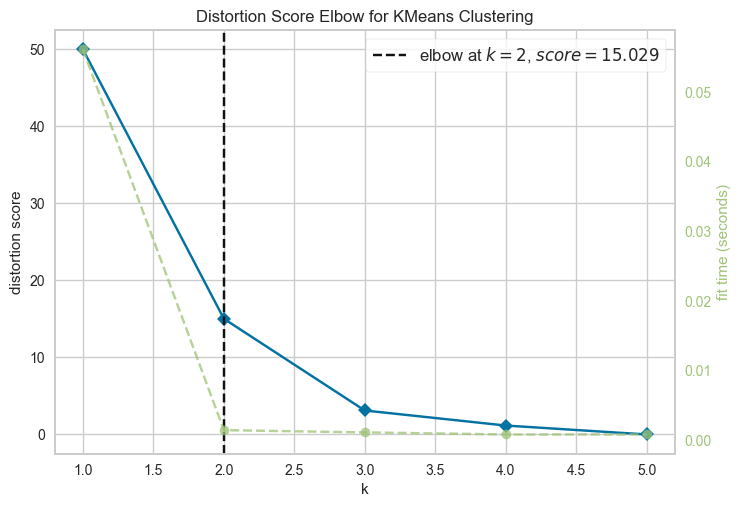

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6))
visualizer.fit(df_scaled)
visualizer.show()

In [12]:
kmeans = KMeans(n_clusters=3).fit(df_scaled)
labels = kmeans.labels_
df_scaled['cluster'] = labels
df_scaled.head()

,wm.member_count,task_created_count,task_modified_count,task_archived_count,label_added_preset_count,label_added_custom_count,label_created_count,label_modified_count,column_renamed_count,board_renamed_count,cluster
0,1.985381,1.922433,1.953606,1.658312,1.602972,1.561502,1.724938,1.663264,1.195229,1.262672,2
1,-0.672643,-0.785219,-0.626628,-0.979912,-1.499554,-1.455036,-1.411313,-1.491202,-1.792843,-1.651186,1
2,-0.292925,0.027077,-0.073721,-0.226134,0.310253,0.496841,-0.104542,-0.057354,0.597614,0.777029,0
3,-0.509907,-0.514454,-0.626628,-0.979912,-0.206835,-0.212932,-0.104542,-0.057354,0.000000,-0.194257,0
4,-0.509907,-0.649836,-0.626628,0.527645,-0.206835,-0.390375,-0.104542,-0.057354,0.000000,-0.194257,0


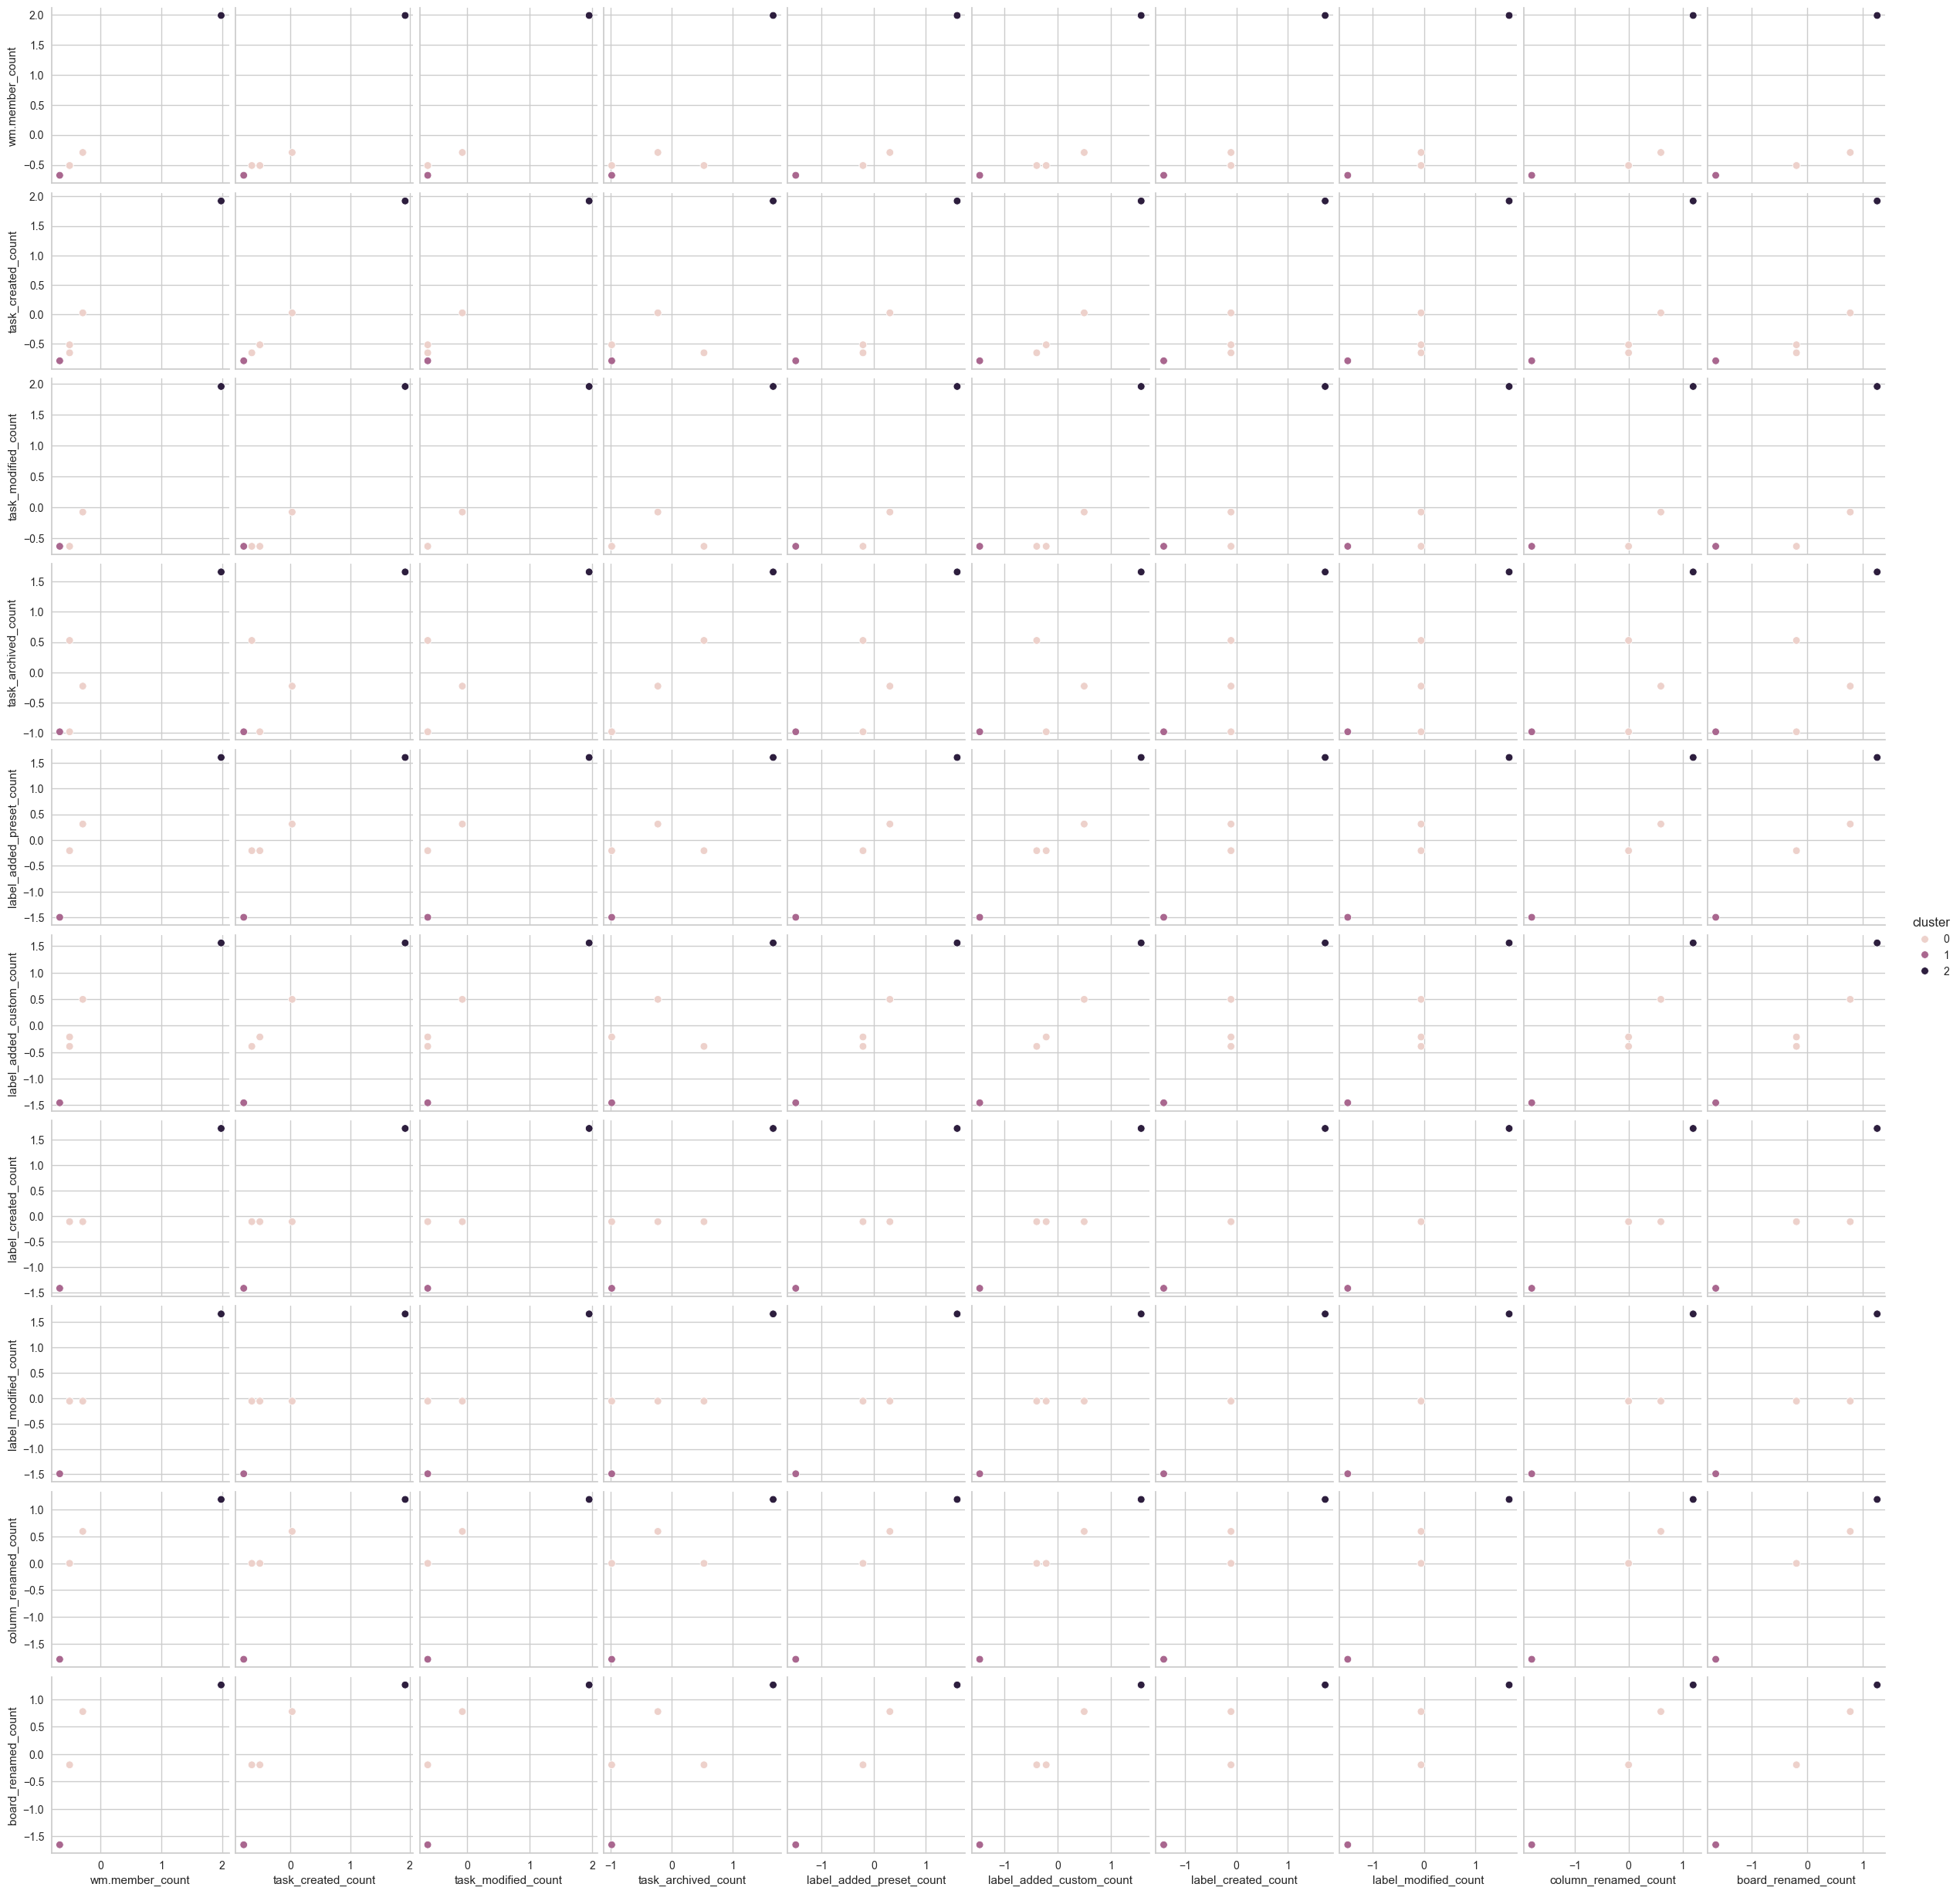

In [13]:
sns.pairplot(data=df_scaled,hue='cluster',diag_kind=None)